# GS MLP 3

Explorando busca em grade para encontrar melhor combinação de neurônios para MLP com 3 camadas ocultas.

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

## Carregando dados

In [2]:
# Carregando DataFrame
chainDF = pd.read_csv('./corrente.csv')

targetS = chainDF.pop('classe')

# Carregando Rótulos das características
feature_names = chainDF.columns

# Carregando rótulos das classes
target_names = ['Normal', 'HI-1', 'HI-2', 'HI-3', 'LI-1', 'LI-2', 'LI-3']

# Definindo variáveis
X, y = chainDF.to_numpy(), targetS.to_numpy()

# Declarando intervalo dos valores de camada oculta
three_layer_sizes = np.array([(layer1, layer2, layer3) for layer1 in np.arange(20, 65, 20) for layer2 in np.arange(20, 65, 20) for layer3 in np.arange(20, 65, 20)])

# Declarando array com sementes para reprodutibilidade da distribuição
seed_array3 = np.random.randint(0, 9000, 10)

print(f'seeds: {seed_array3};\nhidden_layer_sizes:\n{three_layer_sizes};')

seeds: [6728 1326 6915 2149 4436 8186  591 1731 7953 5530];
hidden_layer_sizes:
[[20 20 20]
 [20 20 40]
 [20 20 60]
 [20 40 20]
 [20 40 40]
 [20 40 60]
 [20 60 20]
 [20 60 40]
 [20 60 60]
 [40 20 20]
 [40 20 40]
 [40 20 60]
 [40 40 20]
 [40 40 40]
 [40 40 60]
 [40 60 20]
 [40 60 40]
 [40 60 60]
 [60 20 20]
 [60 20 40]
 [60 20 60]
 [60 40 20]
 [60 40 40]
 [60 40 60]
 [60 60 20]
 [60 60 40]
 [60 60 60]];


In [3]:
# Declarando lista com arrays de acurácia para cada camada
three_layer_acc = []

for hidden_layer in three_layer_sizes:
    # Declarando lista para armazenar acurácias de cada rodada
    acc = []

    # Rodadas de classificação
    for seed in seed_array3:
        # Distribuindo os dados
        X_pre_train, X_pre_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

        # Instanciando Standard Scaler
        sc = StandardScaler().fit(X_pre_train)

        # Pré-processando dados
        X_train = sc.transform(X_pre_train)
        X_test = sc.transform(X_pre_test)

        # Instanciando e treinando classificador
        classifier = MLPClassifier(
            hidden_layer_sizes=hidden_layer,
        ).fit(
            X_train,
            y_train
        )

        # Gerando resultados e adicionando à lista
        acc.append(classifier.score(X_test, y_test))
    
    three_layer_acc.append(acc)

threeLayerDF = pd.DataFrame(
    data=np.array(three_layer_acc),
    index=np.array([f'hls:{hidden_layer}' for hidden_layer in three_layer_sizes])
).transpose()

threeLayerDF.transpose()

,0,1,2,3,4,5,6,7,8,9
hls:[20 20 20],0.698507,0.679318,0.652026,0.676759,0.691258,0.658422,0.702345,0.702345,0.656290,0.724094
hls:[20 20 40],0.744563,0.711727,0.695949,0.719403,0.720256,0.703198,0.698507,0.707889,0.698081,0.705330
hls:[20 20 60],0.727932,0.704051,0.727505,0.718977,0.754371,0.715139,0.741151,0.716418,0.682729,0.715991
hls:[20 40 20],0.732196,0.733475,0.690832,0.739446,0.701066,0.722388,0.716844,0.738593,0.732196,0.744136
hls:[20 40 40],0.752665,0.724094,0.750533,0.729211,0.751812,0.745842,0.742431,0.738593,0.701919,0.721535
hls:[20 40 60],0.757783,0.736034,0.742004,0.750959,0.743710,0.735608,0.749680,0.755224,0.729638,0.735181
hls:[20 60 20],0.751386,0.702772,0.736887,0.723667,0.718124,0.738166,0.733902,0.735608,0.694243,0.739446
hls:[20 60 40],0.755224,0.727079,0.733475,0.741578,0.784222,0.729638,0.729638,0.759915,0.757783,0.732623
hls:[20 60 60],0.770576,0.755224,0.759062,0.757356,0.776972,0.747122,0.762473,0.771855,0.758209,0.765032
hls:[40 20 20],0.736887,0.713859,0.738593,0.723667,0.723241,0.714286,0.714712,0.719403,0.692111,0.715139


,count,mean,std,min,25%,50%,75%,max
hls:[20 20 20],10.0,0.684136,0.023717,0.652026,0.663006,0.685288,0.701386,0.724094
hls:[20 20 40],10.0,0.710490,0.014655,0.695949,0.699680,0.706610,0.717484,0.744563
hls:[20 20 60],10.0,0.720426,0.019560,0.682729,0.715352,0.717697,0.727825,0.754371
hls:[20 40 20],10.0,0.725117,0.017476,0.690832,0.718230,0.732196,0.737313,0.744136
hls:[20 40 40],10.0,0.735864,0.016473,0.701919,0.725373,0.740512,0.749360,0.752665
hls:[20 40 60],10.0,0.743582,0.009527,0.729638,0.735714,0.742857,0.750640,0.757783
hls:[20 60 20],10.0,0.727420,0.017770,0.694243,0.719510,0.734755,0.737846,0.751386
hls:[20 60 40],10.0,0.745117,0.018617,0.727079,0.730384,0.737527,0.757143,0.784222
hls:[20 60 60],10.0,0.762388,0.008911,0.747122,0.757569,0.760768,0.769190,0.776972
hls:[40 20 20],10.0,0.719190,0.013116,0.692111,0.714392,0.717271,0.723561,0.738593


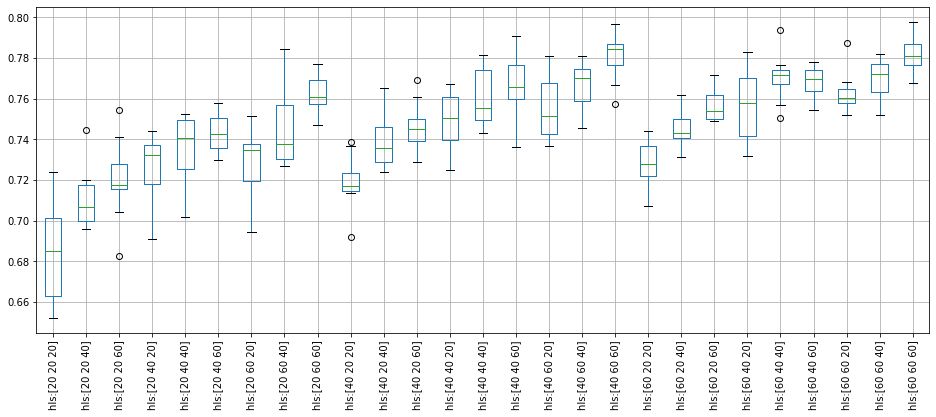

In [6]:
threeLayerDF.boxplot(figsize=(16, 6), rot=90)
threeLayerDF.describe().transpose()